<a href="https://colab.research.google.com/github/Data-junkie4crumbs/Data-junkie4crumbs.github.io/blob/master/Kaggle_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('setup complete')

setup complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
# Path of the file to read
iris_filepath = "/content/gdrive/My Drive/Kaggle/iris.csv"
# Read the file into a variable iris_data
iris_data= pd.read_csv(iris_filepath, index_col="Id")
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


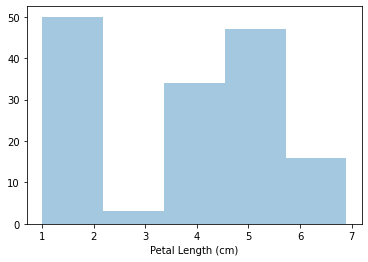

In [22]:
sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)

We customize the behavior of the command with two additional pieces of information:

a= chooses the column we'd like to plot (in this case, we chose 'Petal Length (cm)').
kde=False is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.

The next type of plot is a kernel density estimate (KDE) plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curve (and data= has identical functionality as when we made the histogram above).

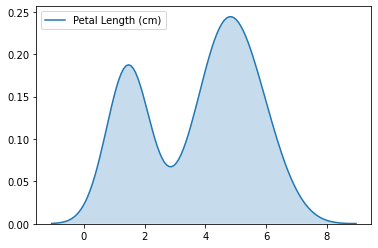

In [23]:
# KDE plot 
sns.kdeplot(data= iris_data['Petal Length (cm)'], shade=True)

#2D KDE plots
We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the sns.jointplot command.

In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely.

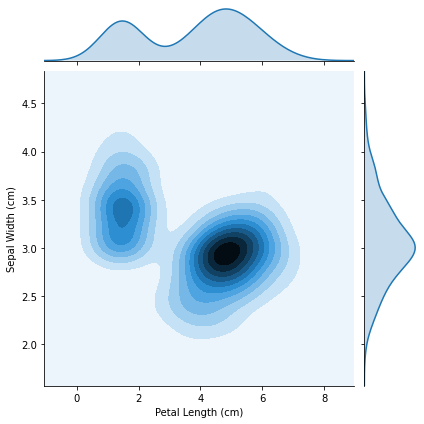

In [26]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y= iris_data['Sepal Width (cm)'], kind="kde")

Note that in addition to the 2D KDE plot in the center,

the curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, iris_data['Petal Length (cm)']), and
the curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, iris_data['Sepal Width (cm)']).

#Color-coded plots
Next, we'll create plots to understand differences between the species. To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.

In [33]:
# Paths of the files to read
iris_set_filepath = "/content/gdrive/My Drive/Kaggle/iris_setosa.csv"
iris_ver_filepath = "/content/gdrive/My Drive/Kaggle/iris_versicolor.csv"
iris_vir_filepath = "/content/gdrive/My Drive/Kaggle/iris_virginica.csv"
# Read the files into variables 
iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")
# Print the first 5 rows of the Iris versicolor data
iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In the code cell below, we create a different histogram for each species by using the sns.distplot command (as above) three times. We use label= to set how each histogram will appear in the legend.

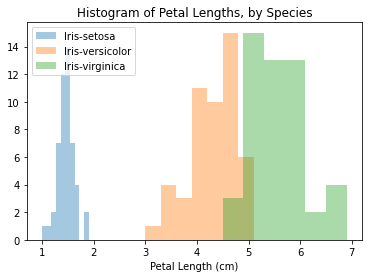

In [36]:
sns.distplot(a=iris_set_data['Petal Length (cm)'], label= 'Iris-setosa', kde=False)
sns.distplot(a= iris_ver_data['Petal Length (cm)'], label= 'Iris-versicolor', kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label='Iris-virginica', kde=False)
# Add title 
plt.title('Histogram of Petal Lengths, by Species')
# Force legend to appear
plt.legend()

In this case, the legend does not automatically appear on the plot. To force it to show (for any plot type), we can always use plt.legend().

We can also create a KDE plot for each species by using sns.kdeplot (as above). Again, label= is used to set the values in the legend.

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

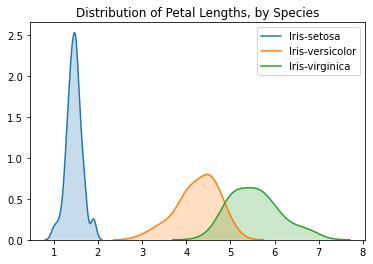

In [40]:
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label='Iris-setosa', shade=True)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label='Iris-versicolor', shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label='Iris-virginica', shade=True)
# Add title
plt.title("Distribution of Petal Lengths, by Species")

One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where Iris versicolor and Iris virginica seem to have similar values for petal length, while Iris setosa belongs in a category all by itself.

In fact, according to this dataset, we might even be able to classify any iris plant as Iris setosa (as opposed to Iris versicolor or Iris virginica) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be Iris setosa!